In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df_train = pd.read_csv("/content/drive/MyDrive/AIHACK/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/AIHACK/test.csv")

## Necessary function

In [3]:
def create_train_test_flag(df_train, df_test):
    df_train['train_flag'] = 1
    df_test['train_flag'] = 0
    total_df = pd.concat([df_train, df_test], axis = 0)
    return total_df

def get_columns(total_df):
    columns = total_df.columns.to_list()
    columns.remove('train_flag')
    return columns

def groupby_mean(total_df , column_mean , column_feature):
    feature_groupby_mean_df = total_df[column_mean].groupby(total_df[column_feature]).mean()
    feature_groupby_mean_df = feature_groupby_mean_df.reset_index()
    return feature_groupby_mean_df

def groupby_count(total_df , column_count , column_feature):
    feature_groupby_count_df = total_df[column_count].groupby(total_df[column_feature]).count()
    feature_groupby_count_df = feature_groupby_count_df.reset_index()
    return feature_groupby_count_df

In [4]:
total_data = create_train_test_flag(df_train , df_test)

In [5]:
total_data.info()
total_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 4521 entries, 0 to 521
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  y           4521 non-null   object
 17  train_flag  4521 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 671.1+ KB


,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


## Normal EDA for train & test data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
total_data.to_csv('total_df.csv')

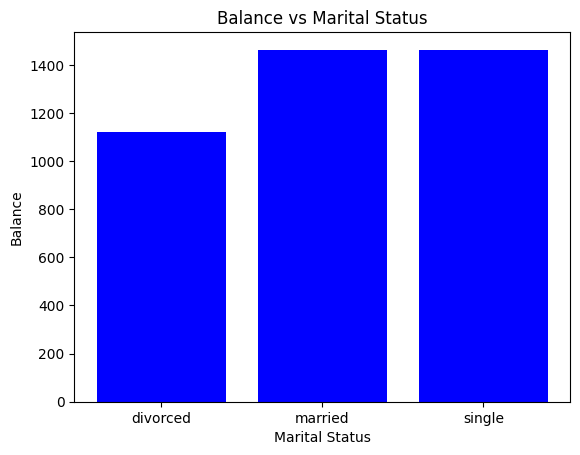

In [8]:
balance_marital = total_data['balance'].groupby(total_data['marital']).mean()
balance_marital = balance_marital.reset_index()
plt.bar(balance_marital['marital'] , balance_marital['balance'] , color = 'blue')
plt.xlabel("Marital Status")
plt.ylabel("Balance")
plt.title("Balance vs Marital Status")
plt.show()

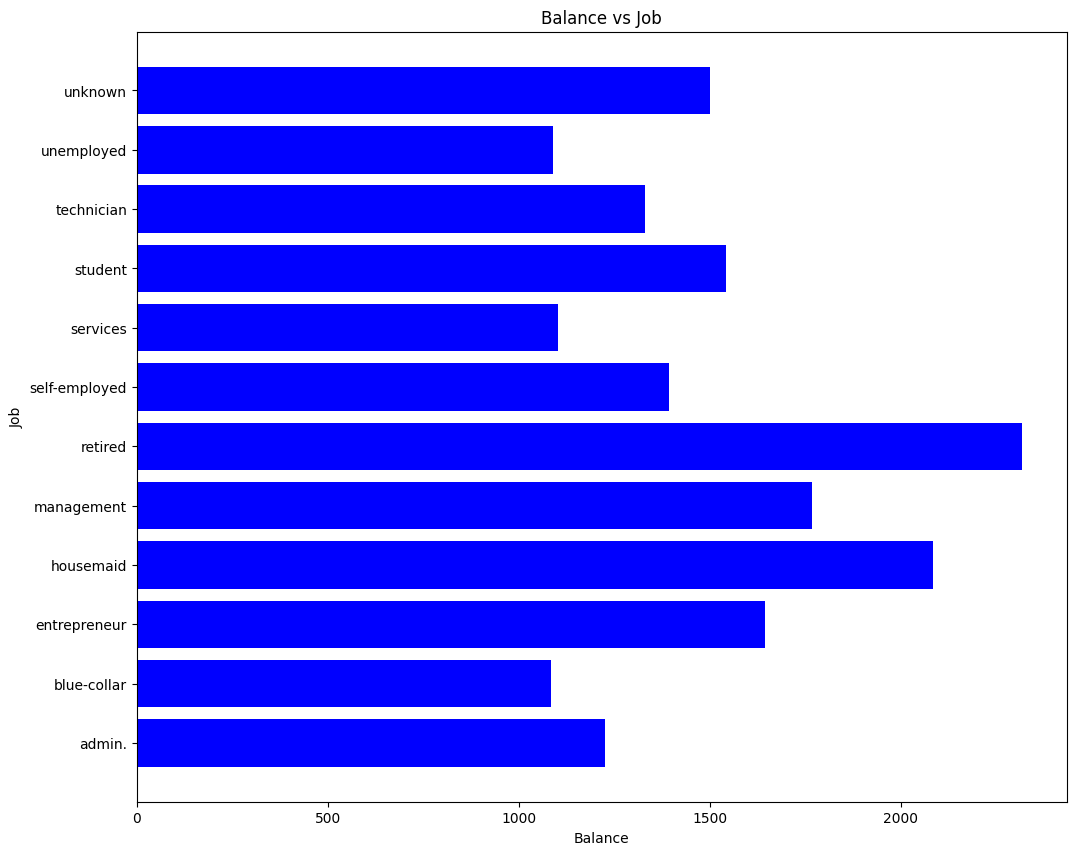

In [9]:
balance_job = total_data['balance'].groupby(total_data['job']).mean()
balance_job = balance_job.reset_index()
plt.figure(figsize=(12, 10))
plt.barh(balance_job['job'], balance_job['balance'], color='blue')
plt.xlabel("Balance")
plt.ylabel("Job")
plt.title("Balance vs Job")
plt.show()

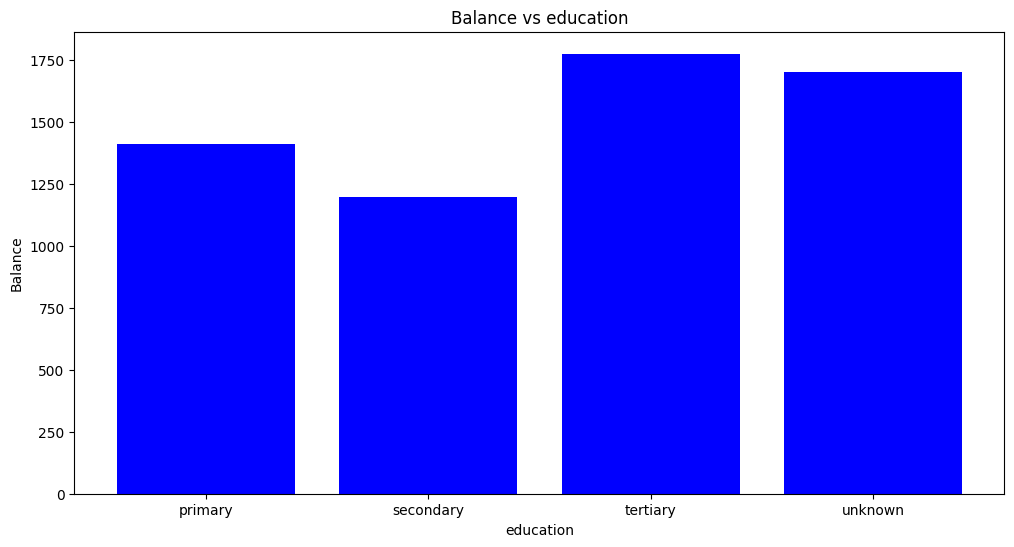

In [10]:
balance_education = total_data['balance'].groupby(total_data['education']).mean()
balance_education = balance_education.reset_index()
plt.figure(figsize=(12, 6))
plt.bar(balance_education['education'] , balance_education['balance'] , color = 'blue')
plt.xlabel("education")
plt.ylabel("Balance")
plt.title("Balance vs education")
plt.show()

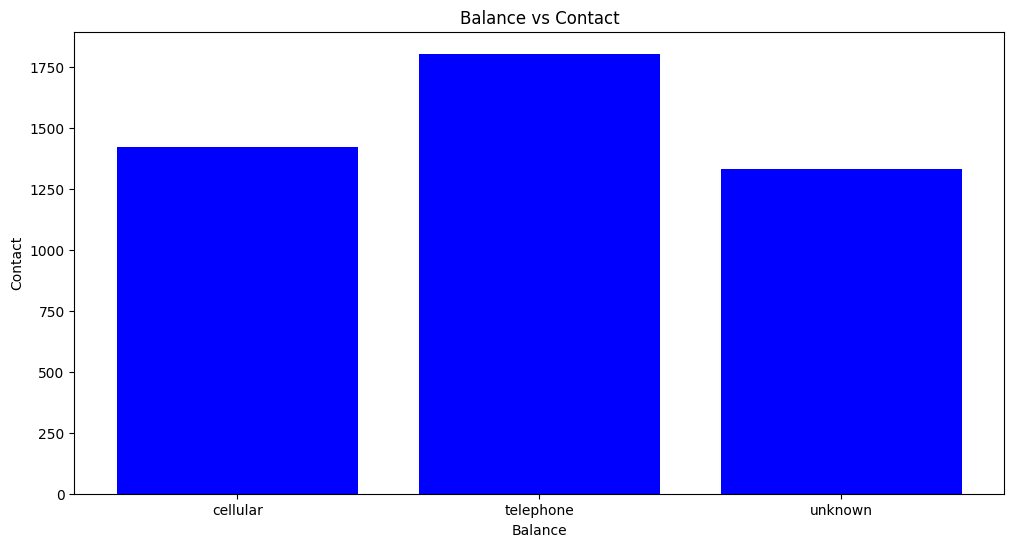

In [11]:
balance_contact = total_data['balance'].groupby(total_data['contact']).mean()
balance_contact = balance_contact.reset_index()
plt.figure(figsize=(12, 6))
plt.bar(balance_contact['contact'], balance_contact['balance'], color='blue')
plt.xlabel("Balance")
plt.ylabel("Contact")
plt.title("Balance vs Contact")
plt.show()

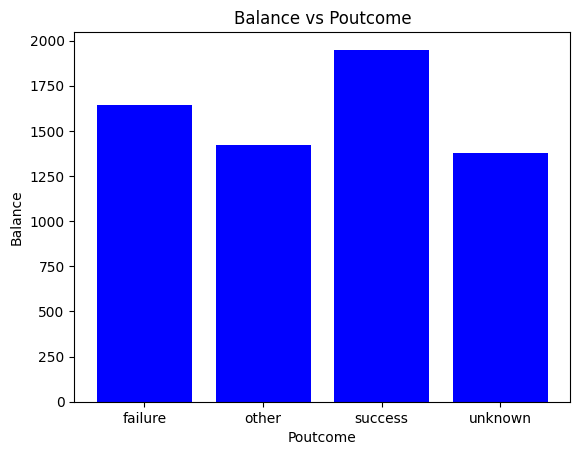

In [12]:
balance_poutcome = total_data['balance'].groupby(total_data['poutcome']).mean()
balance_poutcome = balance_poutcome.reset_index()
plt.bar(balance_poutcome['poutcome'] , balance_poutcome['balance'] , color = 'blue')
plt.xlabel("Poutcome")
plt.ylabel("Balance")
plt.title("Balance vs Poutcome")
plt.show()

## Feature Extraction with some functions

<ipython-input-13-eaffe5643251>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], ax=axes[i], palette='Set1')
<ipython-input-13-eaffe5643251>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], ax=axes[i], palette='Set1')
<ipython-input-13-eaffe5643251>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], ax=axes[i], palette='Set1')
<ipython-input-13-eaffe5643251>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

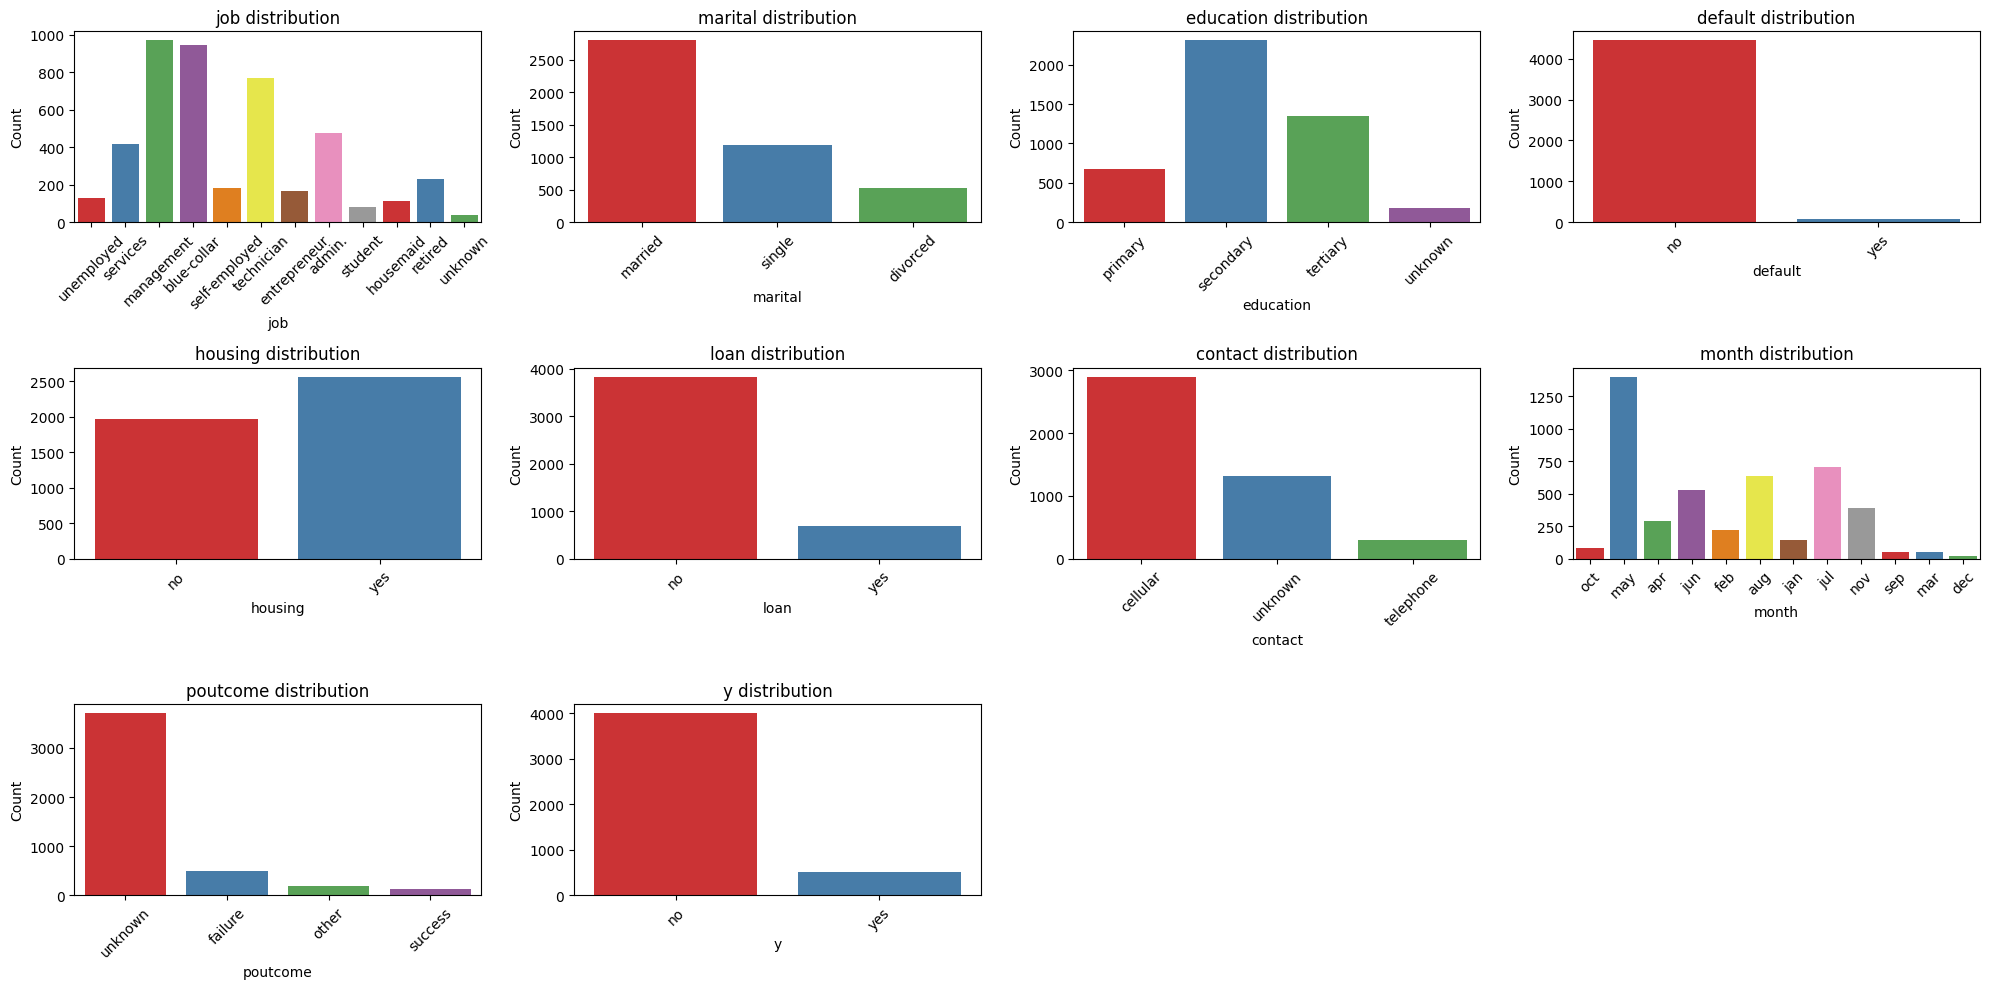

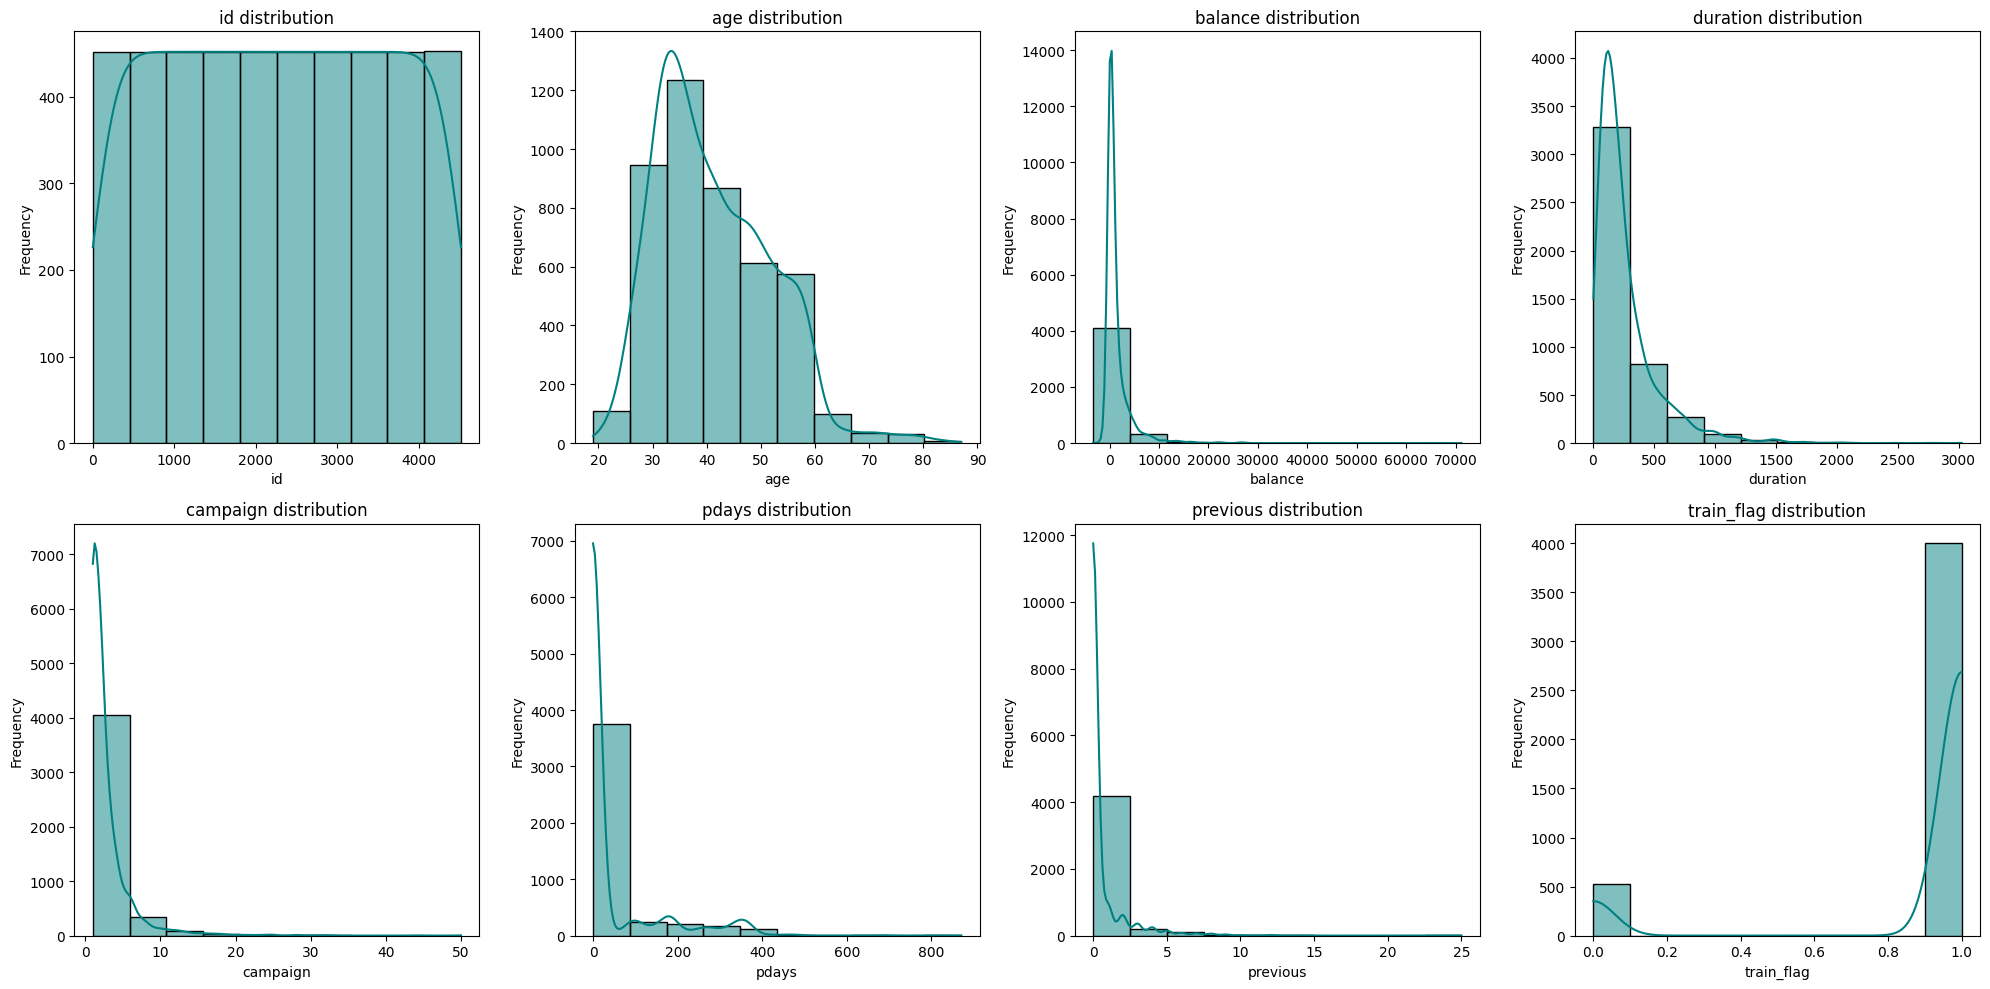

In [13]:
def feature_type(total_data):
  categorical_cols = total_data.select_dtypes(include=['object']).columns
  numerical_cols = total_data.select_dtypes(include=['int64', 'float64']).columns
  return categorical_cols , numerical_cols

def yes_no_tobinary(total_data):
  total_data['y'] = total_data['y'].map({'yes': 1, 'no': 0})
  return total_data

# Function to plot columns in subplots
def plot_columns(cols, data, plot_type='categorical'):
    n_cols = 4  # Number of columns in the grid
    n_rows = (len(cols) + n_cols - 1) // n_cols  # Calculate number of rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        if plot_type == 'categorical':
            sns.countplot(x=data[col], ax=axes[i], palette='Set1')
            axes[i].set_title(f'{col} distribution')
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
        else:
            sns.histplot(data[col], kde=True, ax=axes[i], color='teal', bins=10)
            axes[i].set_title(f'{col} distribution')
            axes[i].set_ylabel('Frequency')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


categorical_cols , numerical_cols = feature_type(total_data)

# Plot categorical columns
plot_columns(categorical_cols, total_data, plot_type='categorical')

# Plot numerical columns
plot_columns(numerical_cols, total_data, plot_type='numerical')

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def encode_data(total_data):
  total_data_encoded = total_data.copy()
  object_cols = total_data.select_dtypes(include=['object']).columns
  for col in object_cols:
    label_encoder = LabelEncoder()
    total_data_encoded[col] = label_encoder.fit_transform(total_data[col])

  return total_data_encoded


## Data Correlation with Y

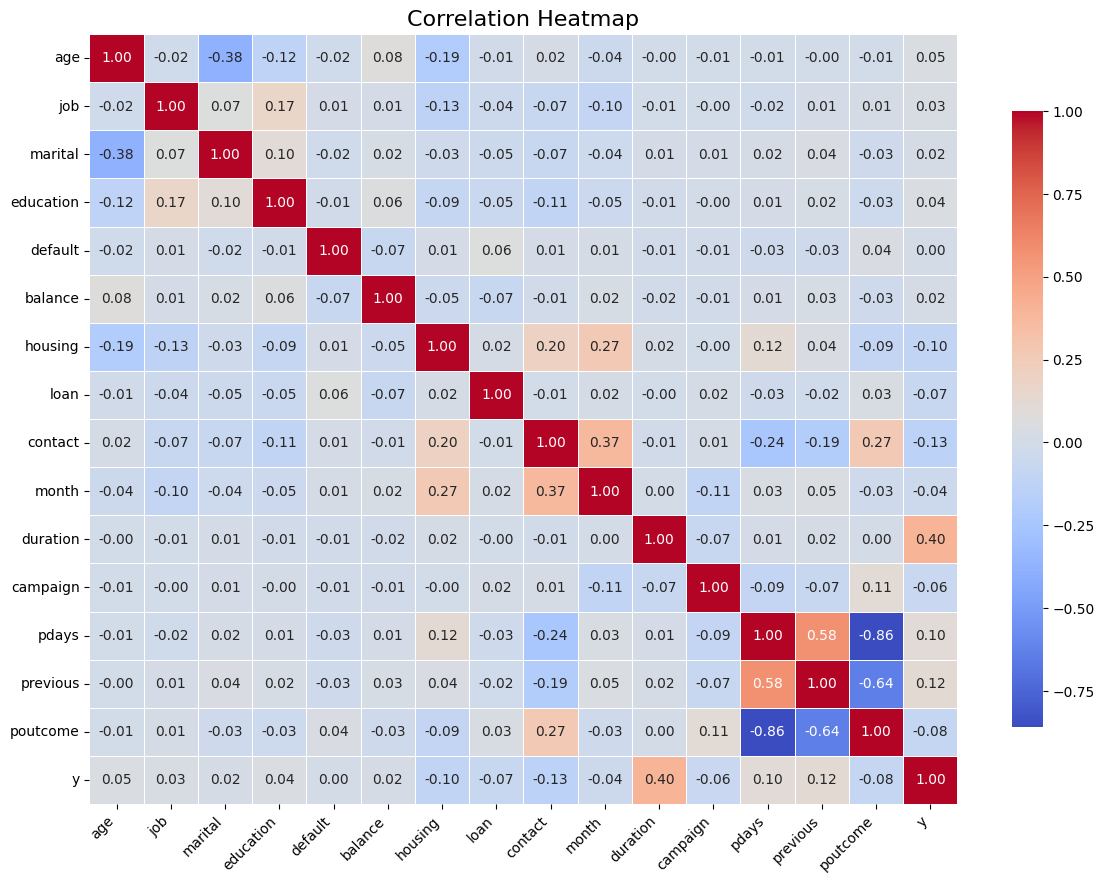

In [15]:
total_data_encoded = encode_data(total_data)
total_data_encoded.drop(columns=['id' , 'train_flag'] , axis = 1 , inplace = True)
total_data_encoded_corr = total_data_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(total_data_encoded_corr,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 10},
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
total_data_encoded_corr['y'].sort_values(ascending=False)

,y
y,1.000000
duration,0.401118
previous,0.116714
pdays,0.104087
age,0.045092
education,0.042987
job,0.027401
balance,0.017905
marital,0.015042
default,0.001303


## Data preprocessing Continue with some necessary functions

In [17]:
total_data_encoded = encode_data(total_data)
total_data_train = total_data_encoded[total_data_encoded['train_flag'] == 1]
total_data_test = total_data_encoded[total_data_encoded['train_flag'] == 0]
total_data_test

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,train_flag
0,4000,44,7,1,1,0,27,0,0,0,8,485,1,-1,0,3,0,0
1,4001,53,0,0,1,0,26,1,0,0,8,56,1,359,1,0,0,0
2,4002,36,9,1,1,0,191,0,0,0,1,69,1,-1,0,3,0,0
3,4003,58,9,0,1,0,-123,0,0,0,1,131,2,-1,0,3,0,0
4,4004,26,8,2,1,0,-147,0,0,2,6,95,2,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,4517,33,7,1,1,0,-333,1,0,0,5,329,5,-1,0,3,0,0
518,4518,57,6,1,2,1,-3313,1,1,2,8,153,1,-1,0,3,0,0
519,4519,57,9,1,1,0,295,0,0,0,1,151,11,-1,0,3,0,0
520,4520,28,1,1,1,0,1137,0,0,0,3,129,4,211,3,1,0,0


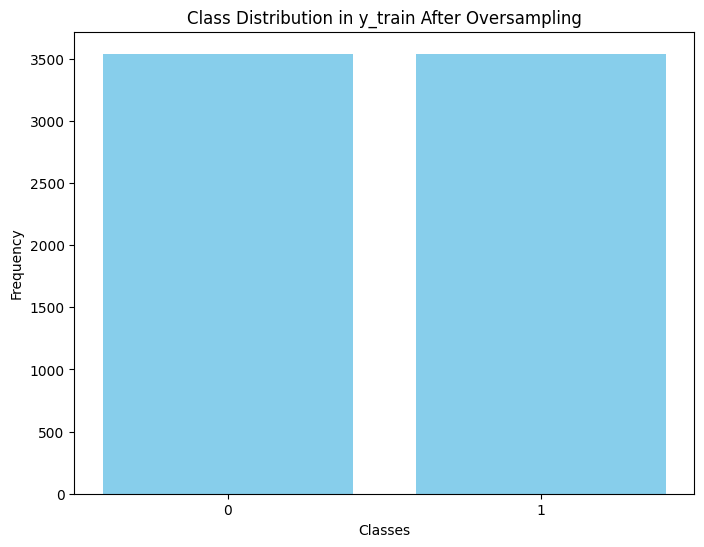

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def create_training_dataset(total_data_train , exclude_col):
  columns = total_data_train.columns
  columns = columns.drop(exclude_col)
  scaler = StandardScaler()
  X_train = total_data_train[columns]
  y_train = total_data_train['y']
  smote = SMOTE(random_state=42) # oversampling
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
  return X_train_resampled , y_train_resampled

def create_train_test(total_data_test , exclude_col):
    columns = total_data_test.columns
    columns = columns.drop(exclude_col)
    scaler = StandardScaler()
    X_test = total_data_test[columns]
    y_test = total_data_test['y']
    return X_test , y_test

def plot_y_train_distribution(y_train_resampled):
    class_counts = Counter(y_train_resampled)
    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.title("Class Distribution in y_train After Oversampling")
    plt.xticks(list(class_counts.keys()))  # Add labels for each class
    plt.show()



exclude_col = ['id' , 'y' , 'train_flag']

X_train , y_train = create_training_dataset(total_data_train , exclude_col)
X_test , y_test = create_train_test(total_data_test , exclude_col)

#plot y_train after resampled
plot_y_train_distribution(y_train)


## Create Training Model

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'lr__C': 10, 'rf__n_estimators': 200, 'svc__C': 0.1}
Best Score (Cross-Validated): 0.8928273108221795

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       459
           1       0.36      0.68      0.47        63

    accuracy                           0.82       522
   macro avg       0.66      0.76      0.68       522
weighted avg       0.88      0.82      0.84       522

AUC Score: 0.8494


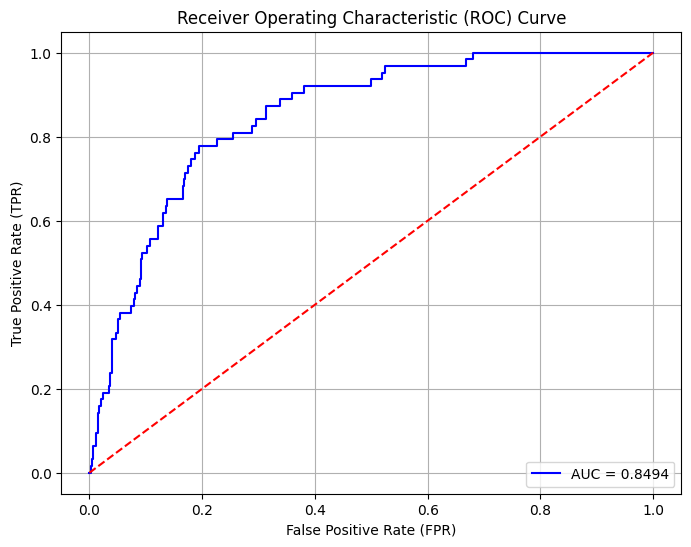

In [19]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define individual classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)

# Combine classifiers into a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='soft'  # 'soft' uses predicted probabilities, 'hard' uses predicted classes
)

# Define parameter grid for GridSearch
param_grid = {
    'lr__C': [0.1, 1, 10],  # Logistic Regression hyperparameters
    'rf__n_estimators': [50, 100, 200],  # Random Forest hyperparameters
    'svc__C': [0.1, 1, 10]  # SVM hyperparameters
}

# Set up k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with k-fold validation
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score from GridSearch
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Cross-Validated):", grid_search.best_score_)

# Evaluate on test data
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
y_pred = grid_search.best_estimator_.predict(X_test)  # Predicted labels

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and print AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random model line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Pycaret

In [20]:
!pip install pycaret

In [24]:
from pycaret.classification import *
import wandb

wandb.init(project="EExAI")

s = setup(data=X_train, target=y_train, session_id=123, log_experiment='wandb', fix_imbalance=True)

best_model_auc = compare_models(sort='AUC')

print(best_model_auc)


wandb: Currently logged in as: fluke1847 (fluke1847-chulalongkorn-university). Use `wandb login --relogin` to force relogin


,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(7082, 16)"
4,Transformed data shape,"(7083, 16)"
5,Transformed train set shape,"(4958, 16)"
6,Transformed test set shape,"(2125, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9318,0.9811,0.9532,0.9147,0.9333,0.8636,0.8649,0.7030
et,Extra Trees Classifier,0.9239,0.9804,0.9387,0.9122,0.9251,0.8479,0.8485,0.7600
xgboost,Extreme Gradient Boosting,0.9310,0.9797,0.9500,0.9158,0.9324,0.8620,0.8631,0.1850
lightgbm,Light Gradient Boosting Machine,0.9256,0.9783,0.9451,0.9100,0.9270,0.8511,0.8522,0.5750
gbc,Gradient Boosting Classifier,0.8933,0.9607,0.9096,0.8815,0.8950,0.7866,0.7876,0.6400
ada,Ada Boost Classifier,0.8808,0.9487,0.8895,0.8750,0.8818,0.7616,0.7623,0.3770
ridge,Ridge Classifier,0.8416,0.9152,0.8741,0.8215,0.8468,0.6833,0.6851,0.0610
lda,Linear Discriminant Analysis,0.8414,0.9152,0.8741,0.8212,0.8466,0.6829,0.6848,0.0640
lr,Logistic Regression,0.8457,0.9127,0.8568,0.8391,0.8475,0.6914,0.6921,1.2830
knn,K Neighbors Classifier,0.8426,0.9098,0.9161,0.7997,0.8535,0.6853,0.6937,0.1030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


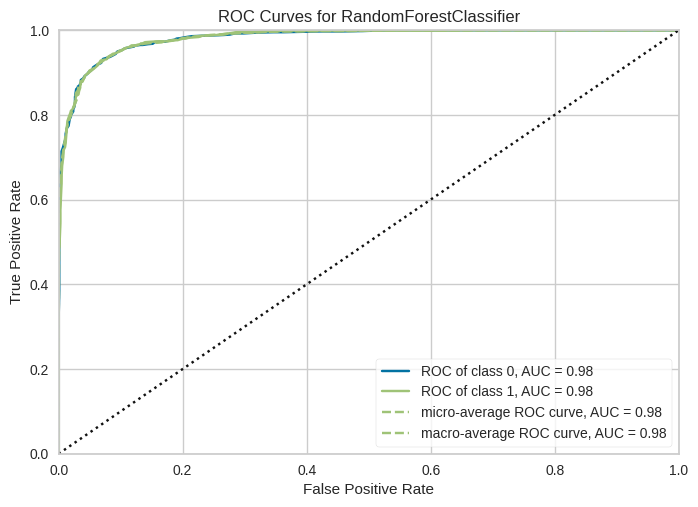

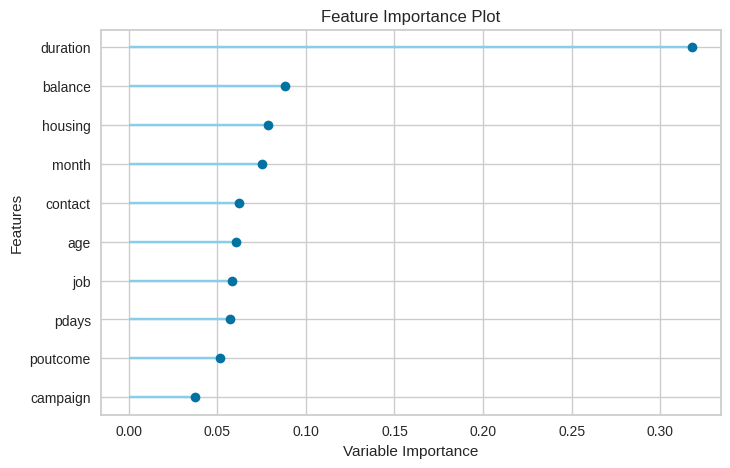

In [25]:
plot_model(best_model_auc, plot = 'auc')
plot_model(best_model_auc, plot = 'feature')

In [27]:
tuned_model = tune_model(best_model_auc, optimize='AUC', return_tuner=True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9443,0.9032,0.8550,0.8784,0.7500,0.7512
1,0.8790,0.9445,0.8831,0.8760,0.8795,0.7581,0.7581
2,0.8710,0.9480,0.8669,0.8740,0.8704,0.7419,0.7420
3,0.8750,0.9535,0.8911,0.8633,0.8770,0.7500,0.7504
4,0.8569,0.9324,0.9032,0.8266,0.8632,0.7137,0.7168
5,0.8629,0.9410,0.8629,0.8629,0.8629,0.7258,0.7258
6,0.8609,0.9377,0.8790,0.8482,0.8634,0.7218,0.7222
7,0.8949,0.9562,0.9153,0.8798,0.8972,0.7899,0.7905
8,0.9030,0.9604,0.9153,0.8937,0.9044,0.8061,0.8063


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [47]:
test_results = predict_model(tuned_model, data=X_test)
test_results = test_results['prediction_score'].to_list()
test_results

,y
0,0.92
1,0.98
2,0.82
3,0.93
4,0.92
...,...
517,0.86
518,0.95
519,0.99
520,0.63


## Data for uploading test result function

In [48]:
def upload_data(total_data_test , test_results):
  df_proba = pd.DataFrame(test_results, columns=['y'])
  id_df = total_data_test['id']
  data_finished = pd.concat([id_df,df_proba],axis=1)
  return data_finished

data_finished = upload_data(total_data_test , y_pred_proba)
data_finished

# optional
# data_finished.to_csv("EExAI_Hackathon.csv", encoding="utf-8", index=False)

,id,y
0,4000,0.735756
1,4001,0.239915
2,4002,0.152028
3,4003,0.204869
4,4004,0.089949
...,...,...
517,4517,0.202974
518,4518,0.136954
519,4519,0.081808
520,4520,0.376064
